## Exercise 2 - The Rosenbrock problem

---

```python
Auther = 'Yubo Cai'
Email = 'yubo.cai@polytechnique.edu'

-------------------------------

List of Work: Exercise 2
- Question 1 - problem finished
- Question 2 - problem finished
- Question 3 - problem finished
- Question 4 - Only the first part with computation of eigenvalue finished

```

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

In this exercise we consider the function
$$
f(x,y) = 100(y-x^{2})^{2} + (1-x)^{2}
$$
This is a classical example, used for bench-marking optimization software. The function has a unique critical point $x^{*}$, the function is non-convex and rather badly conditioned.

**Question 1**

Compute the gradient $\nabla f$ and the Hessian $D^{2} f$ for the function defined above. Prove that the function has a unique minimizer and find the minimizer $x^{*}$.

</div>

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer to Question 1</td>
</tr>
</table>

---

We have 
$$
f(x,y) = 100(y-x^{2})^{2} + (1-x)^{2}
$$ 
Therefore, we have the gradient 
$$
\nabla f(x,y) = \begin{bmatrix} 400x^{3} - 400xy + 2x - 2 \\ 200y - 200x^{2} \end{bmatrix}
$$
Then, we have the Hessian matrix
$$
\nabla^{2} f(x,y) = \begin{bmatrix} 1200x^{2} - 400y + 2 & -400x \\ -400x & 200 \end{bmatrix}
$$
In order to find the critical point, we have
$$
\begin{cases}
400x^{3} - 400xy + 2x - 2 = 0 \\
200y - 200x^{2} = 0
\end{cases}
$$
Therefore, we have
$$
\begin{cases}
x = 1 \\
y = 1
\end{cases}
$$
Then, we have the critical point $x^{*} = (1,1)$

---

In [11]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from ipywidgets import *
%matplotlib notebook

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 2**

Run the algorithms developed in the previous exercise in order to approximate numerically the minimizer of $f$ . Choose as starting point $x_0 =(−1.2, 1.2)$. You may vary the position of $x_0$ if you want.

**Question 3**

Observe the behavior of the trajectory $\left(x_{n}\right)$ given by the gradient descent when you vary the line-search parameters $m_{1}, m_{2}$. Interpret the observed behavior and decide some "heuristics" on what is the better choice by observing the behavior of the algorithm, the number of iterations, of function evaluations, etc.

</div>

Optimization with gradient descent converged: True
Number of iterations: 4061
Final point: [0.99759733 0.99519715]
Minimum value: 5.773889742724176e-06


<IPython.core.display.Javascript object>


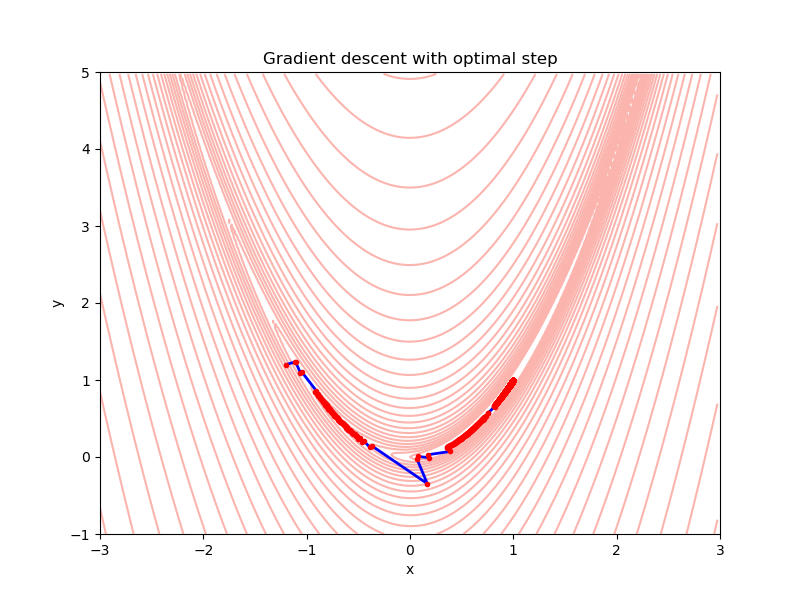

In [32]:
# Define the objective function
def f(x, y):
    return 100 * (y - x ** 2) ** 2 + (1 - x) ** 2

# Define the gradient of the objective function
def df(x, y):
    return np.array([400 * x ** 3 - 400 * x * y + 2 * x - 2, 200 * (y - x ** 2)])

# Define the Hessian matrix of the objective function
def H(x, y):
    return np.array([[1200 * x ** 2 - 400 * y + 2, -400 * x], [-400 * x, 200]])

def gradientOptimalStep(f, df, A, x0, tol=1e-08, maxiter=10000):
    # initialization
    x = x0.copy()
    xtab = []
    ftab = []
    xtab.append(x)  # add x to the list of points
    ftab.append(f(x[0], x[1]))
    it = 0  # iteration
    while ((it == 0)
           or (it < maxiter and np.abs(f(xtab[-1][0], xtab[-1][1]) - f(xtab[-2][0], xtab[-2][1])) > tol)):
        g = df(x[0], x[1])
        opt_step = np.dot(g, g) / np.dot(g, A(x[0], x[1]) @ g)
        x = x - opt_step * g
        xtab.append(x)
        ftab.append(f(x[0], x[1]))
        it = it + 1
    if (it == maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv

# Define the starting point
x0 = np.array([-1.2, 1.2])
xtab, ftab, conv = gradientOptimalStep(f, df, H, x0)

# Print the result
print('Optimization with gradient descent converged:', conv)
print('Number of iterations:', len(xtab))
print('Final point:', xtab[-1])
print('Minimum value:', ftab[-1])

delta = 0.025
x = np.arange(-3, 3, delta)
y = np.arange(-1, 5, delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(8,6))
plt.contour(X, Y, Z, levels=np.logspace(0,5,35), cmap='Pastel1')
plt.plot([x[0] for x in xtab], [x[1] for x in xtab], '-b', linewidth=2)
plt.plot([x[0] for x in xtab], [x[1] for x in xtab], 'or', markersize=3)
plt.xlim(-3, 3)
plt.ylim(-1, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient descent with optimal step')
plt.show()


<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 4**

**(Challenge)** Denote by $H$ the matrix $\left(\begin{array}{cc}802 & -400 \\ -400 & 200\end{array}\right)$. Compute its eigenvalues and decide if it is positive-definite or not. Towards the end of the algorithm, when you are close to the minimum, replace the descent direction $d=-\nabla f(x)$ by $d=-H^{-1} \nabla f(x)$. Is this still a descent direction?

</div>

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer to Question 4</td>
</tr>
</table>

---

To compute the eigenvalues of the matrix $H$, we solve the characteristic equation:
$$
\operatorname{det}(H-\lambda I)=\left|\begin{array}{cc}
802-\lambda & -400 \\
-400 & 200-\lambda
\end{array}\right|=(802-\lambda)(200-\lambda)-(-400) \cdot(-400)=0
$$
Expanding this equation, we obtain $\lambda^2 - 1002\lambda + 400 = 0$. Using the quadratic formula, we get:
$$
\lambda_{1,2}=\frac{1002 \pm \sqrt{1002^{2}-4 \cdot 400}}{2}
$$
Since we have all the eigenvalues larger than 0, the matrix $H$ is positive definite.

When we are close to the minimum, we can use the Newton direction $d=-H^{-1} \nabla f(x)$, which is a descent direction since $H$ is positive definite. This direction is obtained by solving the linear system $Hd=-\nabla f(x)$, which can be done efficiently using a direct method like Gaussian elimination or a iterative method like conjugate gradients.

---

In [16]:
H = np.array([[802, -400], [-400, 200]])
eigvals, eigvecs = np.linalg.eig(H)
print(eigvals)
jusitify = True
for eigen in eigvals:
    if eigen < 0:
        jusitify = False
        print('The Hessian matrix is not positive definite')

if jusitify:
    print('The Hessian matrix is positive definite')

[1.00160064e+03 3.99360767e-01]
The Hessian matrix is positive definite
